# ROS 

### Path planning 

An autonomous vehicle or a robot can find the shortest and most obstacle-free path from a start to goal state. The path can be a set of states (position and orientation) or waypoints. Path planning requires a map of the environment along with start and goal states as input.

### Local and global planner

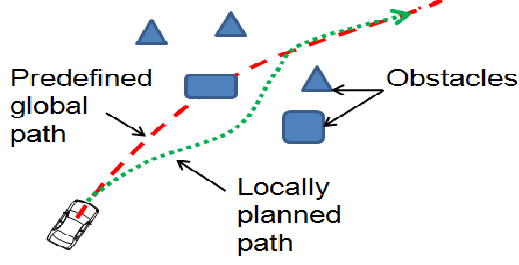

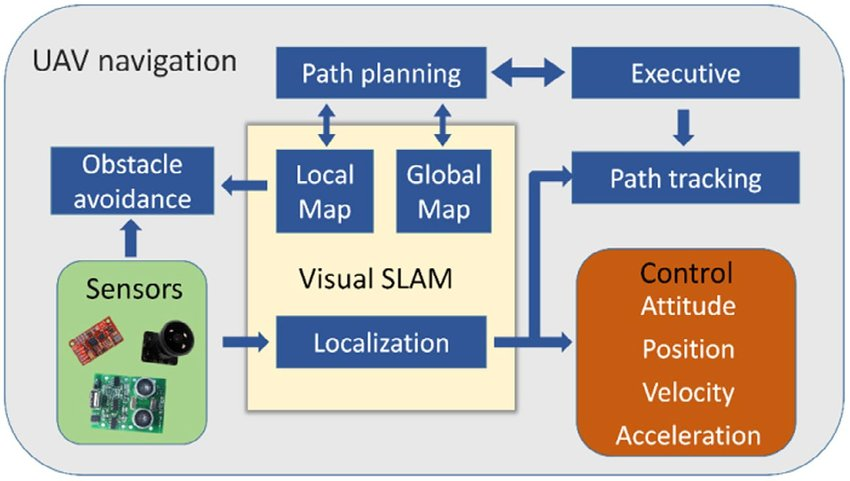

### Make the robot move autonomously
### Create a new package named my_move_base
### Inside this package create a directory named launch

In [ ]:
cd ~/demo_ws/src
catkin_create_pkg my_move_base
cd my_move_base
mkdir src
cd src
mkdir launch

### Inside this directory create a file named my_move_base.launch

In [ ]:
cd launch
touch my_move_base.launch

#### my_move_base.launch

In [ ]:
<!--
    ROS navigation stack with velocity smoother and safety (reactive) controller
-->
<launch>
  <include file="$(find turtlebot_navigation)/launch/includes/velocity_smoother.launch.xml"/>
  <include file="$(find turtlebot_navigation)/launch/includes/safety_controller.launch.xml"/>

  <arg name="odom_frame_id"   default="odom"/>
  <arg name="base_frame_id"   default="base_footprint"/>
  <arg name="global_frame_id" default="map"/>
  <arg name="odom_topic" default="odom" />
  <arg name="laser_topic" default="/kobuki/laser/scan" />
  <arg name="custom_param_file" default="$(find turtlebot_navigation)/param/dummy.yaml"/>

  <node pkg="move_base" type="move_base" respawn="false" name="move_base" output="screen">
    <rosparam file="$(find turtlebot_navigation)/param/costmap_common_params.yaml" command="load" ns="global_costmap" />
    <rosparam file="$(find turtlebot_navigation)/param/costmap_common_params.yaml" command="load" ns="local_costmap" />
    <rosparam file="$(find turtlebot_navigation)/param/local_costmap_params.yaml" command="load" />
    <rosparam file="$(find turtlebot_navigation)/param/global_costmap_params.yaml" command="load" />
    <rosparam file="$(find turtlebot_navigation)/param/dwa_local_planner_params.yaml" command="load" />
    <rosparam file="$(find turtlebot_navigation)/param/move_base_params.yaml" command="load" />
    <rosparam file="$(find turtlebot_navigation)/param/global_planner_params.yaml" command="load" />
    <rosparam file="$(find turtlebot_navigation)/param/navfn_global_planner_params.yaml" command="load" />
    <!-- external params file that could be loaded into the move_base namespace -->
    <rosparam file="$(arg custom_param_file)" command="load" />

    <!-- reset frame_id parameters using user input data -->
    <param name="global_costmap/global_frame" value="$(arg global_frame_id)"/>
    <param name="global_costmap/robot_base_frame" value="$(arg base_frame_id)"/>
    <param name="local_costmap/global_frame" value="$(arg odom_frame_id)"/>
    <param name="local_costmap/robot_base_frame" value="$(arg base_frame_id)"/>
    <param name="DWAPlannerROS/global_frame_id" value="$(arg odom_frame_id)"/>

    <remap from="cmd_vel" to="/cmd_vel"/>
    <remap from="odom" to="$(arg odom_topic)"/>
    <remap from="scan" to="$(arg laser_topic)"/>
  </node>
</launch>

### Launch the file to start the moving autonomously

In [ ]:
roslaunch my_move_base my_move_base.launch

## Make the robot localize and move autonomously

In [ ]:
cd demo_ws/src/my_mapping_launcher/src/
rosrun map_server map_server my_map.yaml

In [ ]:
roslaunch my_localizer_launcher my_localizer.launch

In [ ]:
rosrun rviz rviz

In [ ]:
roslaunch my_move_base my_move_base.launch

### Nodes and topics 

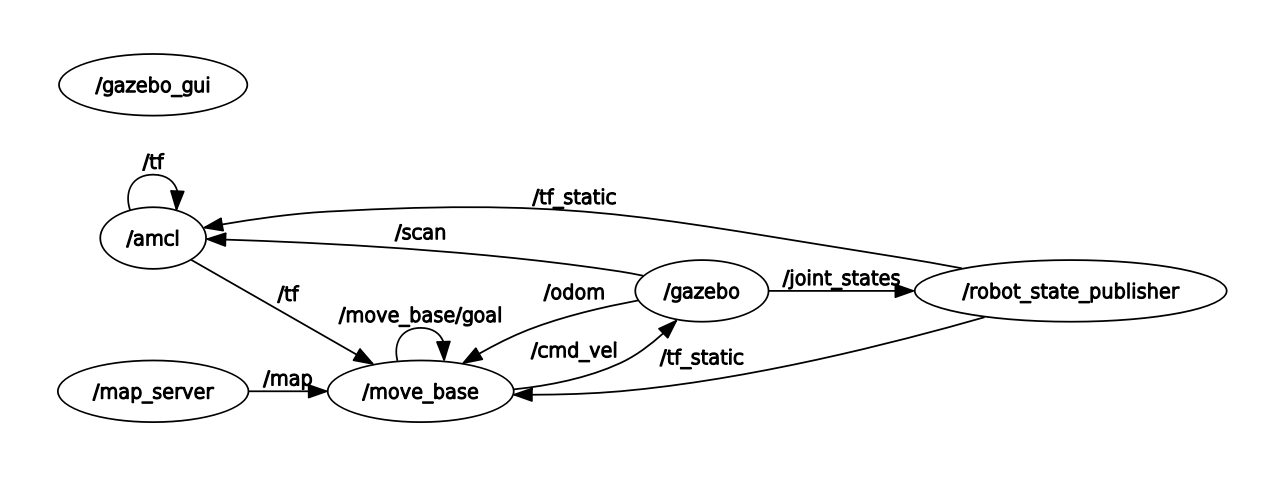

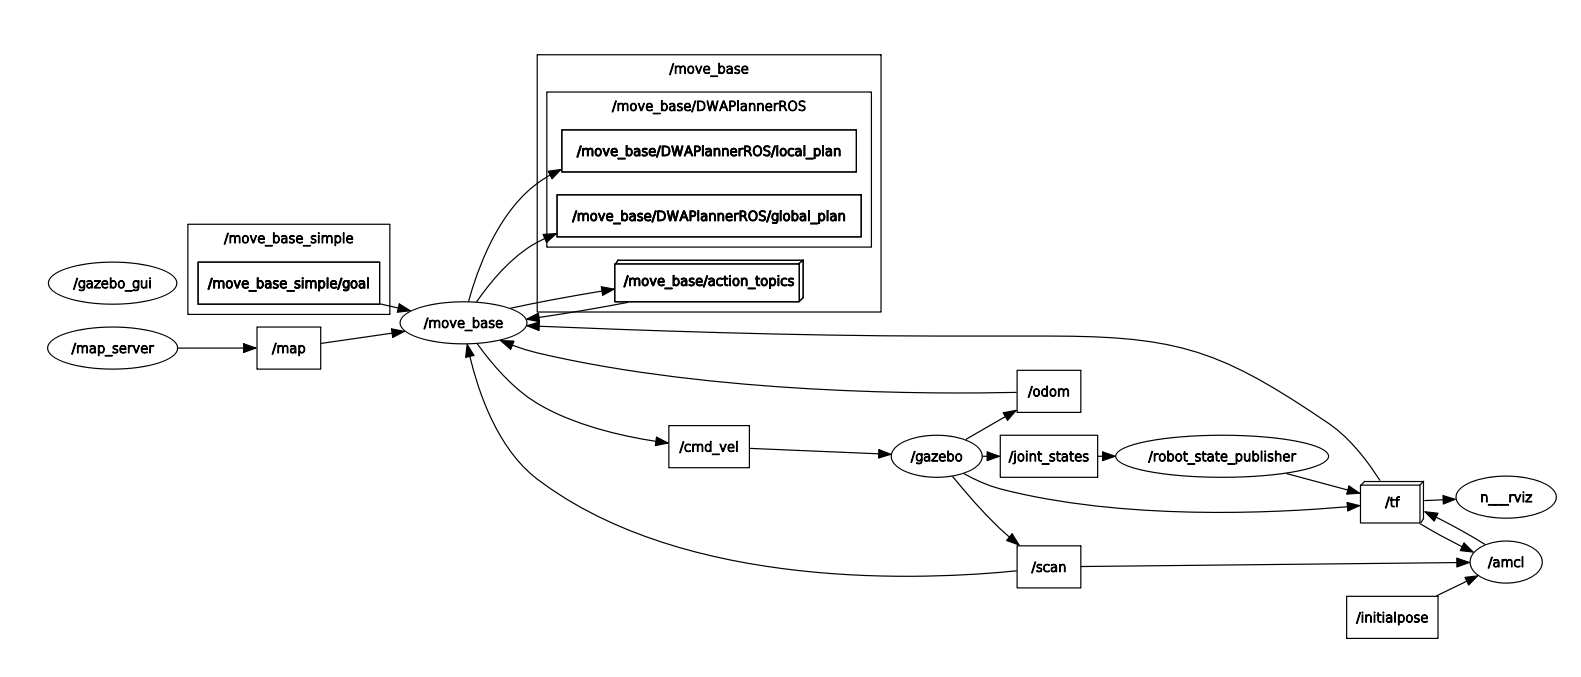

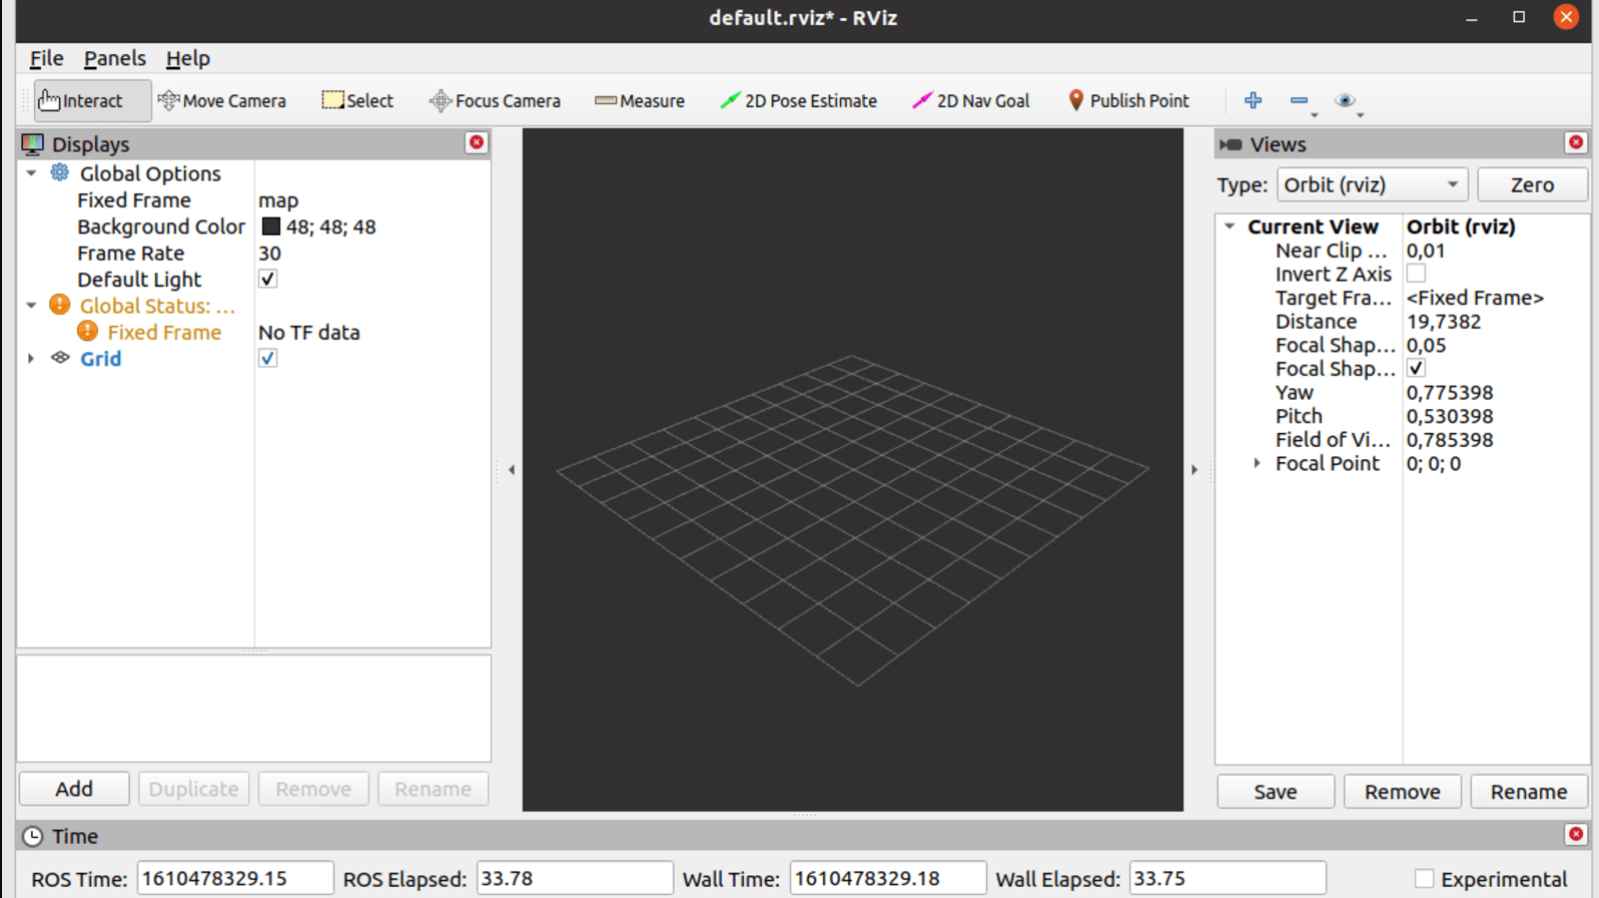

#### With 2D Pose Estimate array correct the position of the robot in order to match with its true position
#### With 2D Nav Goal send the robot to a position and watch it go there

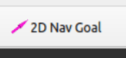

### Excersise 3
#### Make turtlebot move autonomously in your world.

Autonomous Navigation: https://www.youtube.com/playlist?list=PLn8PRpmsu08rLRGrnF-S6TyGrmcA2X7kg 

Sensor Fusion and Tracking: https://www.youtube.com/playlist?list=PLn8PRpmsu08ryYoBpEKzoMOveSTyS-h4a

Ros slides: https://slidetodoc.com/october-2016-ros-lecture-1-ros-introduction-main/